<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW6_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [5]:
#Problem 1 Data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Preprocessing
from google.colab import drive
drive.mount('/content/drive')

#Problem 1
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)


#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

dataset['furnishingstatus'] = dataset['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

#Separate Y and X inputs

dataset_norm = dataset.loc[:, dataset.columns != 'price']

#Min Max or Standard normalize
scalerMM = MinMaxScaler()
dataset_norm = scalerMM.fit_transform(dataset_norm)
Y = np.array(dataset['price'])
Y = np.resize(Y,(len(Y),1))

#Split data into training and validation
np.random.seed(17)
X_train, X_test, Y_train, Y_test = train_test_split(dataset_norm,Y, train_size = 0.8, test_size = 0.2, random_state = 100)



#Create Tensors
Y_train = torch.from_numpy(Y_train).to(torch.float32)
X_train = torch.from_numpy(X_train).to(torch.float32)
Y_test = torch.from_numpy(Y_test).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)


Mounted at /content/drive


Epoch 1, Training loss 26477600964608.0000, Validation loss 25158762889216.0000
Epoch 50, Training loss 3511215194112.0000, Validation loss 3530752000000.0000
Epoch 100, Training loss 3478616276992.0000, Validation loss 3548816867328.0000
Epoch 150, Training loss 3478581411840.0000, Validation loss 3550449238016.0000
Epoch 200, Training loss 3478581149696.0000, Validation loss 3550504026112.0000
Epoch 250, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 300, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 350, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 400, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 450, Training loss 3478580887552.0000, Validation loss 3550505074688.0000
Epoch 500, Training loss 3478580887552.0000, Validation loss 3550505074688.0000


(1.0, 500.0)

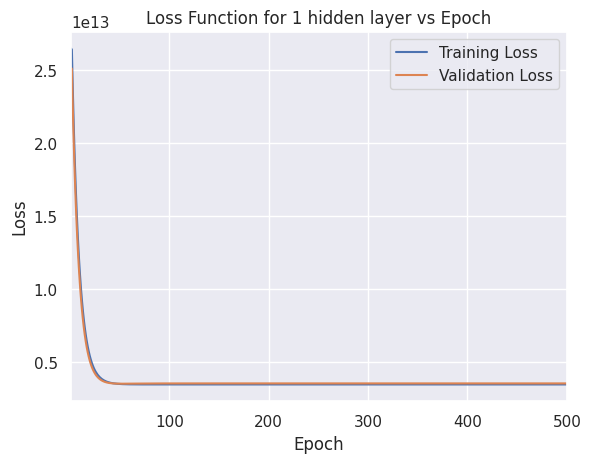

In [6]:
#Problem 1a
import torch.nn as nn

seq_model=nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,1))
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)



epochs=500
loss_fn=nn.MSELoss()
loss_df = pd.DataFrame(columns=['Epoch','Training Loss','Validation Loss'])


for epoch in range(1,epochs +1):
    train = seq_model(X_train)
    loss_train = loss_fn(train,Y_train)

    val = seq_model(X_test)
    loss_val = loss_fn(val,Y_test)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_data= {'Epoch':epoch,'Training Loss':loss_train.detach().numpy(),'Validation Loss':loss_val.detach().numpy()}
    append_data = pd.DataFrame(data=loss_data,index=[epoch])
    loss_df = pd.concat([loss_df,append_data])

    if epoch == 1 or epoch % 50 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")


# print(seq_model.hidden_linear.weight.grad)
# print(seq_model.bias)

#Plot loss over epoch
fig1, ax = plt.subplots()
ax.plot(loss_df['Training Loss'])
ax.plot(loss_df['Validation Loss'])
ax.legend(['Training Loss','Validation Loss'])
ax.set_title('Loss Function for 1 hidden layer vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(1,epochs)

Epoch 1, Training loss 5145639.0000, Validation loss 5015851.0000
Epoch 500, Training loss 5145637.0000, Validation loss 5015849.5000
Epoch 1000, Training loss 5145632.5000, Validation loss 5015844.5000
Epoch 1500, Training loss 5145625.0000, Validation loss 5015838.0000
Epoch 2000, Training loss 5145617.5000, Validation loss 5015830.5000
Epoch 2500, Training loss 5145610.5000, Validation loss 5015823.0000
Epoch 3000, Training loss 5145603.0000, Validation loss 5015815.5000
Epoch 3500, Training loss 5145595.5000, Validation loss 5015808.0000
Epoch 4000, Training loss 5145588.0000, Validation loss 5015801.0000
Epoch 4500, Training loss 5145580.5000, Validation loss 5015793.5000
Epoch 5000, Training loss 5145573.5000, Validation loss 5015786.0000


(1.0, 5000.0)

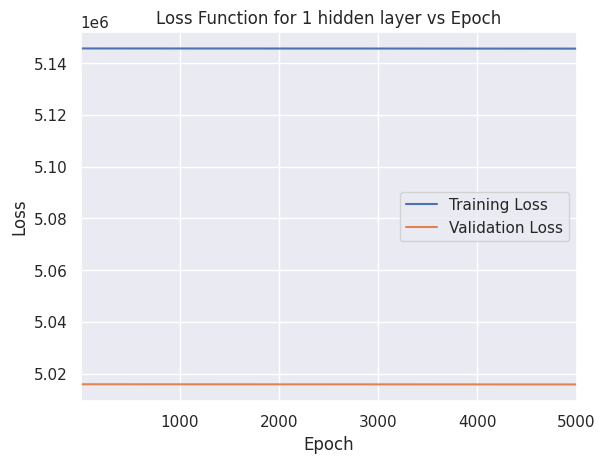

In [7]:

#Problem 1b
seq_model=nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,64),nn.Tanh(),nn.Linear(64,16),nn.Tanh(),nn.Linear(16,1))
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)



epochs=5000
loss_fn=nn.MSELoss()
loss_df = pd.DataFrame(columns=['Epoch','Training Loss','Validation Loss'])


for epoch in range(1,epochs +1):
    train = seq_model(X_train)
    loss_train = torch.sqrt(loss_fn(train,Y_train))

    val = seq_model(X_test)
    loss_val = torch.sqrt(loss_fn(val,Y_test))

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_data= {'Epoch':epoch,'Training Loss':loss_train.detach().numpy(),'Validation Loss':loss_val.detach().numpy()}
    append_data = pd.DataFrame(data=loss_data,index=[epoch])
    loss_df = pd.concat([loss_df,append_data])

    if epoch == 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")


# print(seq_model.hidden_linear.weight.grad)
# print(seq_model.bias)

#Plot loss over epoch
fig1, ax = plt.subplots()
ax.plot(loss_df['Training Loss'])
ax.plot(loss_df['Validation Loss'])
ax.legend(['Training Loss','Validation Loss'])
ax.set_title('Loss Function for 1 hidden layer vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(1,epochs)

In [8]:
#Problem 2
from torchvision import datasets
import torch.nn as nn
import time

data_path = './'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

from torchvision import transforms
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,transform=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

# mean = imgs.view(3, -1).mean(dim=1)
# std = imgs.view(3, -1).std(dim=1)

# transforms.Normalize(mean, std)

transformed_cifar10 = datasets.CIFAR10(
data_path, train=True, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4915, 0.4823, 0.4468),
(0.2470, 0.2435, 0.2616))
]))


imgs_val = torch.stack([img_t for img_t, _ in tensor_cifar10_val], dim=3)
imgs_val.shape

mean = imgs_val.view(3, -1).mean(dim=1)
std = imgs_val.view(3, -1).std(dim=1)

transforms.Normalize(mean, std)

transformed_cifar10_val = datasets.CIFAR10(
data_path, train=False, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4942, 0.4851, 0.4504),
(0.2467, 0.2429, 0.2616))
]))

100%|██████████| 170498071/170498071 [00:04<00:00, 34645765.02it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [9]:
import time
n_out = 10

train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

model = nn.Sequential(
nn.Linear(3072,512),
nn.Tanh(),
nn.Linear(512,10),
nn.Softmax(dim=1)
)

loss_fn = nn.NLLLoss()

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 300
t0 = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")

Epoch: 0, Loss: -0.241654
Epoch: 1, Loss: -0.345880
Epoch: 2, Loss: -0.350321
Epoch: 3, Loss: -0.609946
Epoch: 4, Loss: -0.464761
Epoch: 5, Loss: -0.361354
Epoch: 6, Loss: -0.409445
Epoch: 7, Loss: -0.408432
Epoch: 8, Loss: -0.323134
Epoch: 9, Loss: -0.412433
Epoch: 10, Loss: -0.450693
Epoch: 11, Loss: -0.585276
Epoch: 12, Loss: -0.394251
Epoch: 13, Loss: -0.557469
Epoch: 14, Loss: -0.297882
Epoch: 15, Loss: -0.428993
Epoch: 16, Loss: -0.643473
Epoch: 17, Loss: -0.500618
Epoch: 18, Loss: -0.329168
Epoch: 19, Loss: -0.304260
Epoch: 20, Loss: -0.367962
Epoch: 21, Loss: -0.606792
Epoch: 22, Loss: -0.416044
Epoch: 23, Loss: -0.472699
Epoch: 24, Loss: -0.280921
Epoch: 25, Loss: -0.641875
Epoch: 26, Loss: -0.408866
Epoch: 27, Loss: -0.484551
Epoch: 28, Loss: -0.470030
Epoch: 29, Loss: -0.524460
Epoch: 30, Loss: -0.332677
Epoch: 31, Loss: -0.507563
Epoch: 32, Loss: -0.436395
Epoch: 33, Loss: -0.575571
Epoch: 34, Loss: -0.413284
Epoch: 35, Loss: -0.641164
Epoch: 36, Loss: -0.496238
Epoch: 37, 

In [10]:
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.324


In [11]:
#Problem 2b
from torchvision import datasets
import torch.nn as nn
import time
model2 = nn.Sequential(nn.Linear(3072, 1024),nn.Tanh(),nn.Linear(1024, 512),nn.Tanh(),nn.Linear(512, 128),nn.Tanh(),nn.Linear(128, 10),nn.LogSoftmax(dim=1))
loss_fn = nn.NLLLoss()
t0 = time.time()
n_epochs = 300
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Epoch: 0, Loss: 2.304260
Epoch: 1, Loss: 2.328625
Epoch: 2, Loss: 2.301449
Epoch: 3, Loss: 2.324293
Epoch: 4, Loss: 2.358335
Epoch: 5, Loss: 2.280318
Epoch: 6, Loss: 2.335974
Epoch: 7, Loss: 2.320382
Epoch: 8, Loss: 2.313023
Epoch: 9, Loss: 2.330119
Epoch: 10, Loss: 2.313686
Epoch: 11, Loss: 2.307467
Epoch: 12, Loss: 2.292119
Epoch: 13, Loss: 2.280499
Epoch: 14, Loss: 2.318890
Epoch: 15, Loss: 2.302691
Epoch: 16, Loss: 2.296840
Epoch: 17, Loss: 2.309615
Epoch: 18, Loss: 2.318294
Epoch: 19, Loss: 2.317397
Epoch: 20, Loss: 2.308164
Epoch: 21, Loss: 2.298229
Epoch: 22, Loss: 2.317840
Epoch: 23, Loss: 2.343070
Epoch: 24, Loss: 2.350353
Epoch: 25, Loss: 2.325302
Epoch: 26, Loss: 2.339430
Epoch: 27, Loss: 2.321484
Epoch: 28, Loss: 2.305727
Epoch: 29, Loss: 2.303205
Epoch: 30, Loss: 2.334455
Epoch: 31, Loss: 2.304834
Epoch: 32, Loss: 2.308352
Epoch: 33, Loss: 2.322348
Epoch: 34, Loss: 2.314141
Epoch: 35, Loss: 2.348207
Epoch: 36, Loss: 2.314938
Epoch: 37, Loss: 2.284276
Epoch: 38, Loss: 2.323